In [37]:
import pandas as pd
import numpy as np

# 📂 Load the CSV file
file_path = r"C:\Users\Dar Computers\Desktop\10Acadamy\week 3\data\MachineLearningRating_v3.xlsx"  # update the path if needed
df = pd.read_excel(file_path)

In [43]:
print("🔎 Dataset Preview:")
print(df.head())

🔎 Dataset Preview:
  UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered Citizenship  \
0              145249     12827       2015-03-01             True               
1              145249     12827       2015-05-01             True               
2              145249     12827       2015-07-01             True               
3              145255     12827       2015-05-01             True               
4              145255     12827       2015-07-01             True               

           LegalType Title Language                 Bank      AccountType  \
0  Close Corporation    Mr  English  First National Bank  Current account   
1  Close Corporation    Mr  English  First National Bank  Current account   
2  Close Corporation    Mr  English  First National Bank  Current account   
3  Close Corporation    Mr  English  First National Bank  Current account   
4  Close Corporation    Mr  English  First National Bank  Current account   

   ... CoverCategory   CoverTyp

In [45]:
print("\nℹ️ Data Info:")
df.info()



ℹ️ Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  object        
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 no

In [47]:
print("\n📈 Descriptive Statistics:")
print(df.describe(include='all'))



📈 Descriptive Statistics:
        UnderwrittenCoverID      PolicyID               TransactionMonth  \
count               1000098  1.000098e+06                        1000098   
unique               116409           NaN                            NaN   
top     1990-11-01 00:00:00           NaN                            NaN   
freq                     33           NaN                            NaN   
mean                    NaN  7.956682e+03  2015-02-28 10:49:29.147423744   
min                     NaN  1.400000e+01            2013-10-01 00:00:00   
25%                     NaN  4.500000e+03            2015-01-01 00:00:00   
50%                     NaN  7.071000e+03            2015-04-01 00:00:00   
75%                     NaN  1.107700e+04            2015-06-01 00:00:00   
max                     NaN  2.324600e+04            2015-08-01 00:00:00   
std                     NaN  5.290039e+03                            NaN   

       IsVATRegistered Citizenship   LegalType    Title Lang

In [53]:
df = df[df['TotalClaims'].notnull()]
df = df[df['TotalClaims'] >= 0]


In [55]:
# Columns to clean
columns_to_fill = [
    'VehicleType',
    'MaritalStatus',
    'Gender',
    'Bank',
    'AccountType',
    'NewVehicle'
]

# Fill nulls or blanks with "Not Specified" and standardize casing
for col in columns_to_fill:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace(['', 'nan', 'NaN', 'None'], np.nan)  # normalize blanks
        df[col] = df[col].fillna('Not specified').str.title()


In [56]:
columns_to_drop = [
    'CrossBorder',
    'NumberOfVehiclesInFleet',
    'CustomValueEstimate',
    'Rebuilt',
    'Converted',
    'WrittenOff'
]

# Drop if they exist
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print("✅ Specified columns dropped successfully.")


✅ Specified columns dropped successfully.


In [57]:
# Define the columns to check for missing values
required_columns = [
    'make',
    'Model',
    'Cylinders',
    'cubiccapacity',
    'kilowatts',
    'bodytype',
    'NumberOfDoors',
    'VehicleIntroDate',
    'CapitalOutstanding'
]

# Drop rows where any of these columns are null
df = df.dropna(subset=required_columns)

print(f"✅ Rows with missing values in {required_columns} have been removed.")
print(f"Remaining rows: {len(df)}")


✅ Rows with missing values in ['make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CapitalOutstanding'] have been removed.
Remaining rows: 999539


In [65]:
import numpy as np

def compute_loss_ratio(row):
    premium = row['TotalPremium']
    claims = row['TotalClaims']
    
    if premium == 0 and claims == 0:
        return 0  # or np.nan, depending on your logic
    elif premium == 0:
        return np.nan  # undefined (or inf, but usually we exclude this)
    else:
        return claims / premium

df['LossRatio'] = df.apply(compute_loss_ratio, axis=1)


In [67]:
print("\n🧼 Missing Values Count:")
print(df.isnull().sum())




🧼 Missing Values Count:
UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                             0
AccountType                      0
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
NumberOfDoors                 

In [71]:
# 👉 Summary stats for key numeric fields
summary_cols = ['TotalPremium', 'TotalClaims', 'LossRatio']
summary_stats = df[summary_cols].agg(['mean', 'median', 'std', 'min', 'max'])
print("\n📊 Summary Statistics:")
print(summary_stats)



📊 Summary Statistics:
        TotalPremium    TotalClaims    LossRatio
mean       99.222231      64.359187     0.349625
median      7.271754       0.000000     0.000000
std       190.005271    2369.535151     9.286035
min      -782.576754       0.000000     0.000000
max      2253.507281  393092.105263  2553.600000


In [73]:
# 🕒 DATE FIELD CHECK
print("\n📅 Checking TransactionMonth data type:")
print(df['TransactionMonth'].head())


📅 Checking TransactionMonth data type:
0   2015-03-01
1   2015-05-01
2   2015-07-01
3   2015-05-01
4   2015-07-01
Name: TransactionMonth, dtype: datetime64[ns]


In [77]:
# 🧾 CATEGORICAL FORMATTING CHECK
categorical_cols = ['Gender', 'Province', 'PostalCode', 'VehicleType']
print("\n📋 Unique values in key categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:10]}")  # show first 10 unique values

print("\n✅ Data understanding & summarization completed.")


📋 Unique values in key categorical columns:
Gender: ['Not Specified' 'Male' 'Female']
Province: ['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape'
 'Limpopo' 'North West' 'Free State' 'Northern Cape']
PostalCode: [1459 1513 1619 1625 1629 1852 1982 2007 2066 4093]
VehicleType: ['Passenger Vehicle' 'Medium Commercial' 'Heavy Commercial'
 'Light Commercial' 'Bus']

✅ Data understanding & summarization completed.


In [79]:
# 🧼 1.2.3 — DATA QUALITY ASSESSMENT

print("🔍 Checking for missing values in each column:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_report = pd.DataFrame({
    'MissingValues': missing,
    'MissingPercent': missing_percent.round(2)
}).sort_values(by='MissingPercent', ascending=False)
print(missing_report[missing_report['MissingValues'] > 0])

🔍 Checking for missing values in each column:
              MissingValues  MissingPercent
LossRatio            381299           38.15
TotalPremium         381299           38.15


In [83]:
# 🧾 Check for inconsistent formats (e.g., numeric values stored as strings)
print("\n🔍 Checking columns with suspected formatting issues:")

suspect_cols = ['TotalPremium', 'TotalClaims', 'TransactionMonth']
for col in suspect_cols:
    print(f"\n📌 Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Example values: {df[col].unique()[:5]}")


🔍 Checking columns with suspected formatting issues:

📌 Column: TotalPremium
Data type: float64
Example values: [ 21.92982456          nan 512.84807018   3.25643463  50.47473684]

📌 Column: TotalClaims
Data type: float64
Example values: [    0.          2294.09649123  2040.47368421 46492.21175439
 26516.85964912]

📌 Column: TransactionMonth
Data type: datetime64[ns]
Example values: <DatetimeArray>
['2015-03-01 00:00:00', '2015-05-01 00:00:00', '2015-07-01 00:00:00',
 '2015-01-01 00:00:00', '2015-04-01 00:00:00']
Length: 5, dtype: datetime64[ns]


In [95]:
# Check for duplicate rows
print("\n🔁 Checking for duplicate rows:")
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Found {num_duplicates} duplicate rows.")

# Delete duplicate rows
df = df.drop_duplicates()
print("\n🔁 Duplicate rows have been deleted.")

# Check for duplicate rows again
duplicates_after = df.duplicated()
num_duplicates_after = duplicates_after.sum()
print(f"Found {num_duplicates_after} duplicate rows after deletion.")


🔁 Checking for duplicate rows:
Found 0 duplicate rows.

🔁 Duplicate rows have been deleted.
Found 0 duplicate rows after deletion.


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


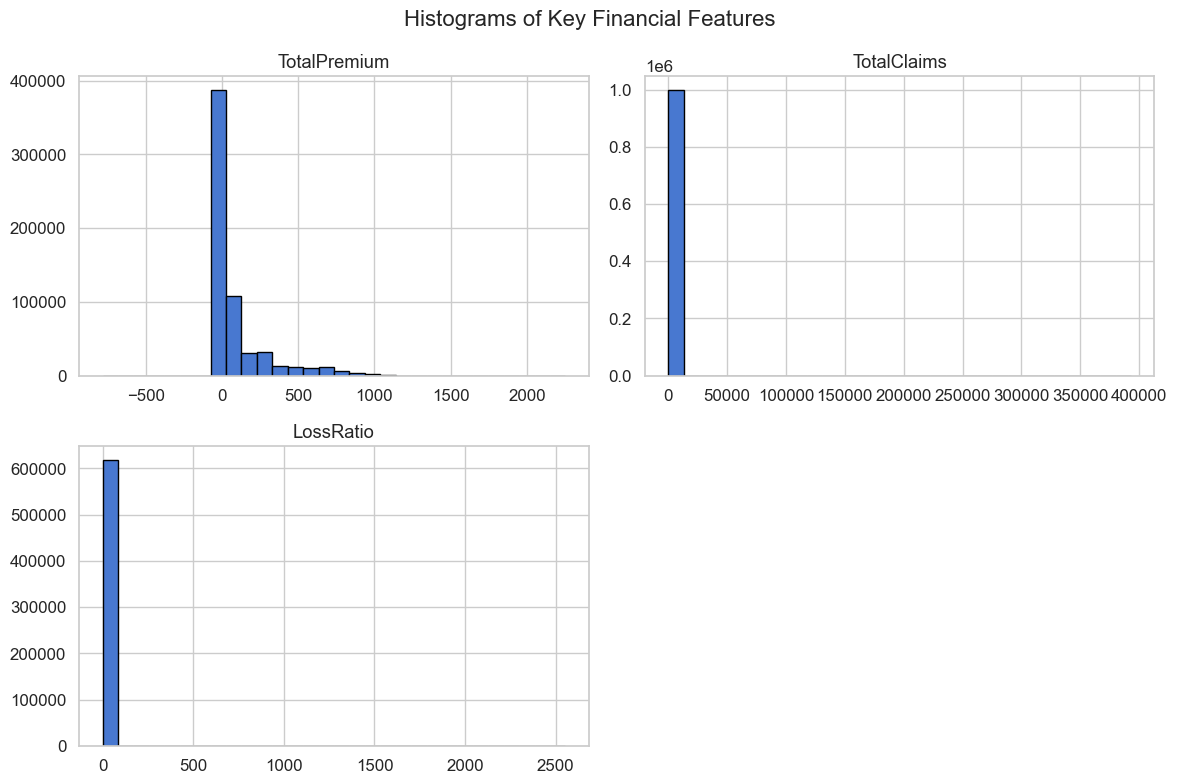

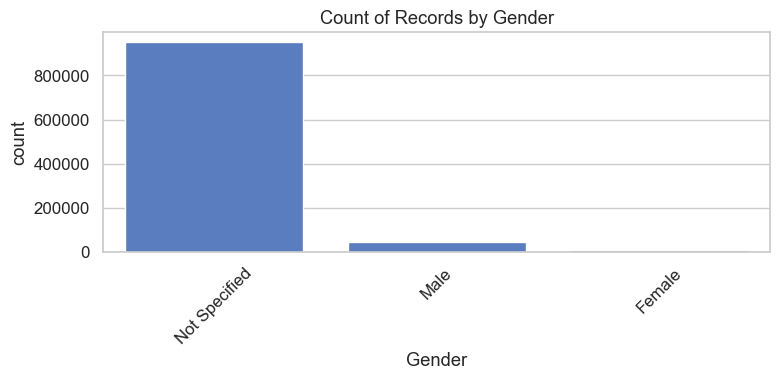

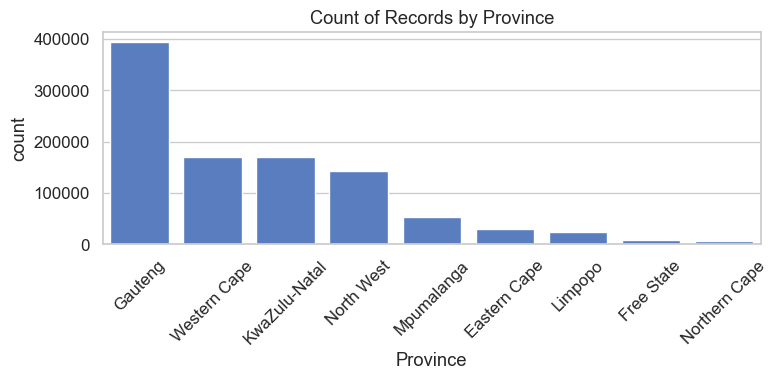

In [103]:
# Histograms for numerical variables
num_cols = ['TotalPremium', 'TotalClaims', 'LossRatio']
df[num_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Key Financial Features", fontsize=16)
plt.tight_layout()
plt.show()

# Bar plots for categorical variables
cat_cols = ['Gender', 'Province']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of Records by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


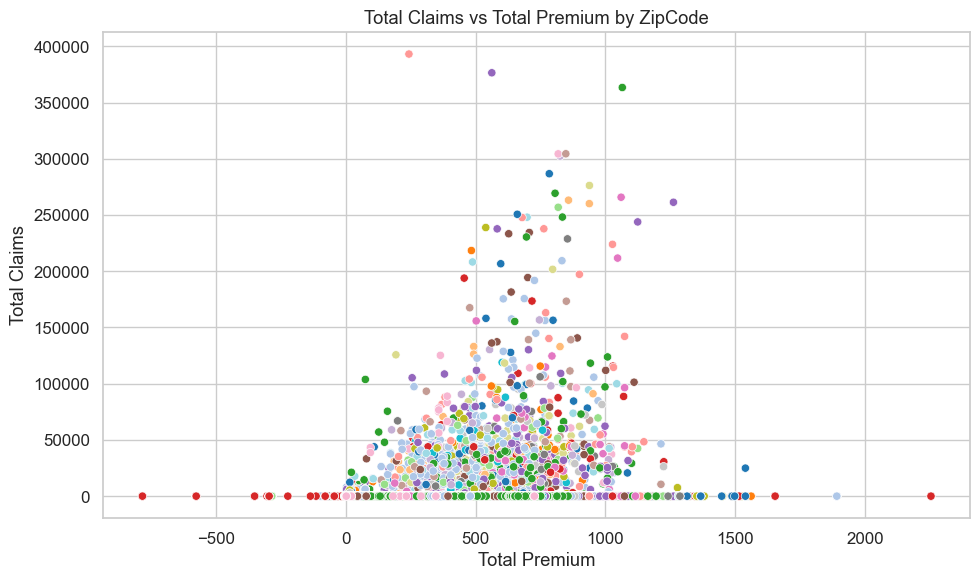

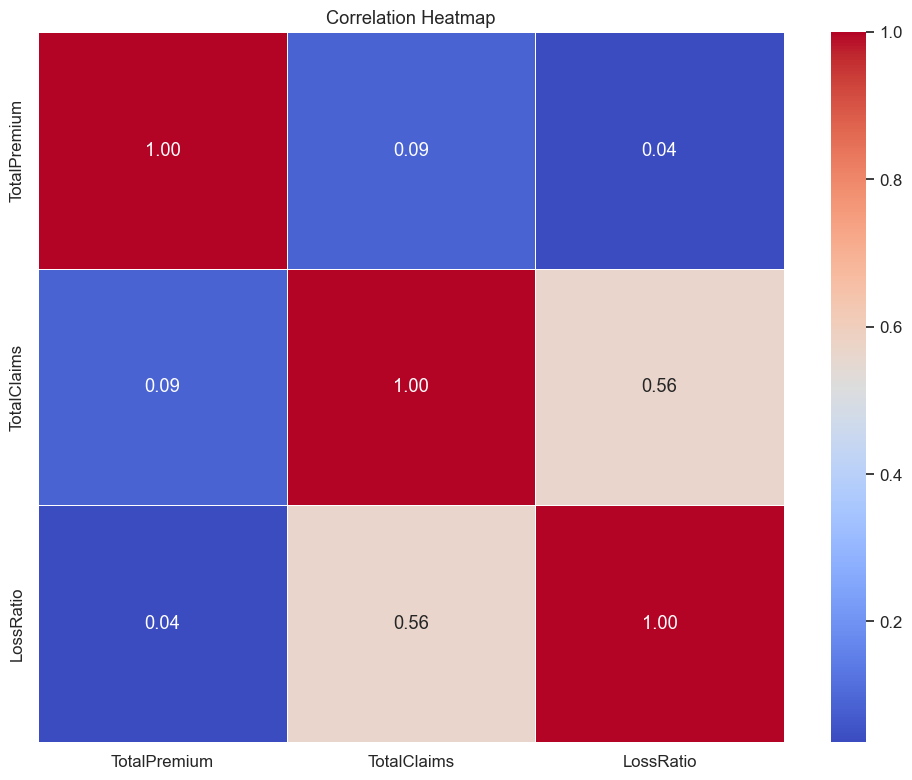

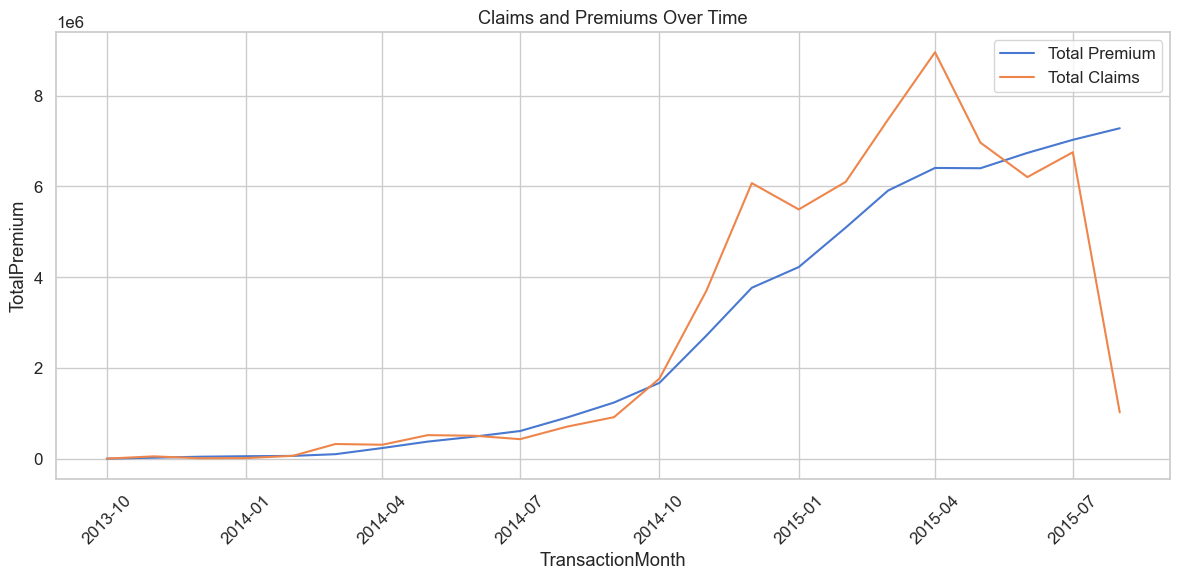

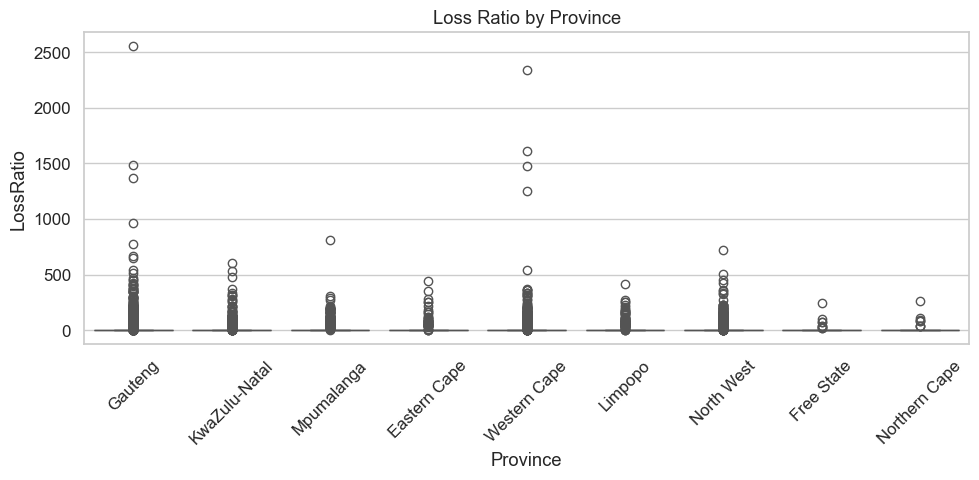

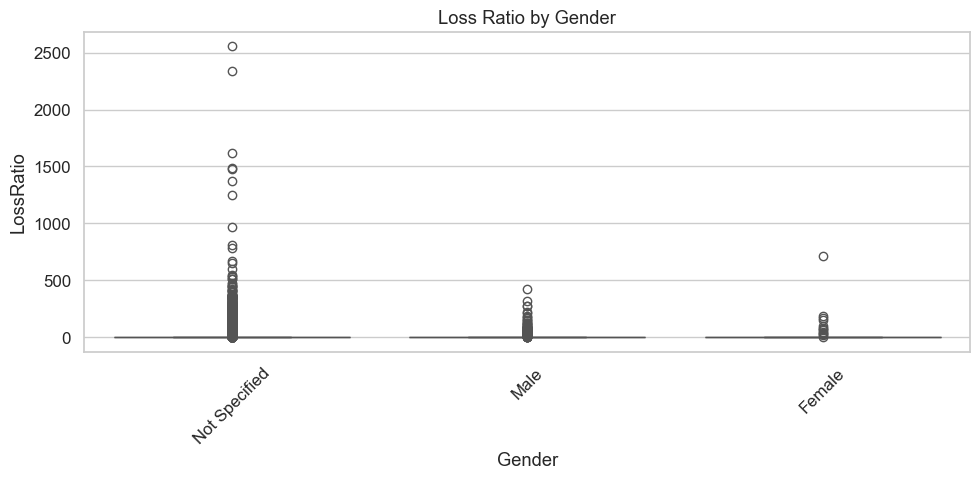

In [105]:
# Scatter plot: TotalPremium vs TotalClaims (color by PostalCode)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab20', legend=False)
plt.title("Total Claims vs Total Premium by ZipCode")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Line plots over time
monthly_df = df.groupby('TransactionMonth')[['TotalPremium', 'TotalClaims']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_df, x='TransactionMonth', y='TotalPremium', label='Total Premium')
sns.lineplot(data=monthly_df, x='TransactionMonth', y='TotalClaims', label='Total Claims')
plt.title("Claims and Premiums Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplots of LossRatio by group
group_cols = ['Province', 'Gender']
for col in group_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='LossRatio')
    plt.title(f"Loss Ratio by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [107]:
# Group by Province & PostalCode
geo_group = df.groupby(['Province', 'PostalCode'])[['TotalPremium', 'TotalClaims', 'LossRatio']].mean().reset_index()
print("\n📍 Geo-Grouped Summary (first 10 rows):")
print(geo_group.head(10))

# Group by Make & Model
vehicle_group = df.groupby(['make', 'Model'])[['TotalClaims']].mean().sort_values(by='TotalClaims', ascending=False).head(10)
print("\n🚗 Vehicles with Highest Avg Claims:")
print(vehicle_group)

# Time trend of claims & premiums already plotted above



📍 Geo-Grouped Summary (first 10 rows):
       Province  PostalCode  TotalPremium  TotalClaims  LossRatio
0  Eastern Cape        4800    128.321213     0.000000   0.000000
1  Eastern Cape        4810           NaN     0.000000        NaN
2  Eastern Cape        4811    144.437073     0.000000   0.000000
3  Eastern Cape        4820     98.007520   156.990310   0.382351
4  Eastern Cape        4930     98.183113     0.000000   0.000000
5  Eastern Cape        4960    104.725261     1.958241   0.166393
6  Eastern Cape        4980    134.487061     0.000000   0.000000
7  Eastern Cape        4990    136.916632     0.000000   0.000000
8  Eastern Cape        5000    100.663796    26.131963   0.373961
9  Eastern Cape        5040    123.170275     0.000000   0.000000

🚗 Vehicles with Highest Avg Claims:
                                                                 TotalClaims
make                                Model                                   
TOYOTA                              L/CRUIS

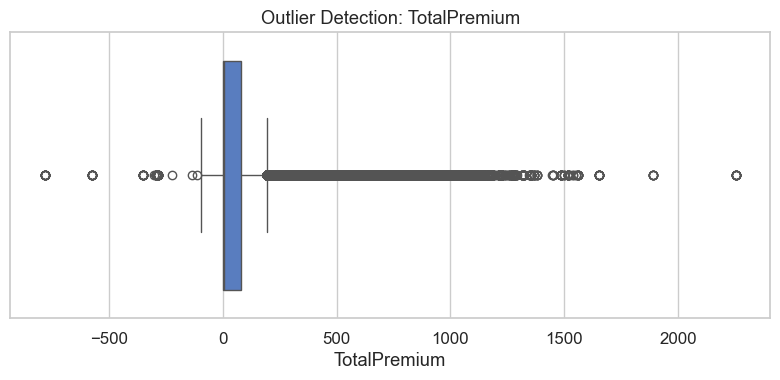

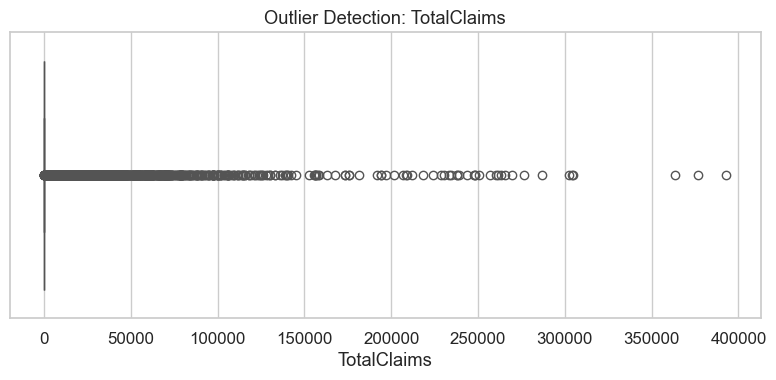

ValueError: Could not interpret value `CustomValueEstimate` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>

In [109]:
# Boxplots for outliers
for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Outlier Detection: {col}")
    plt.tight_layout()
    plt.show()


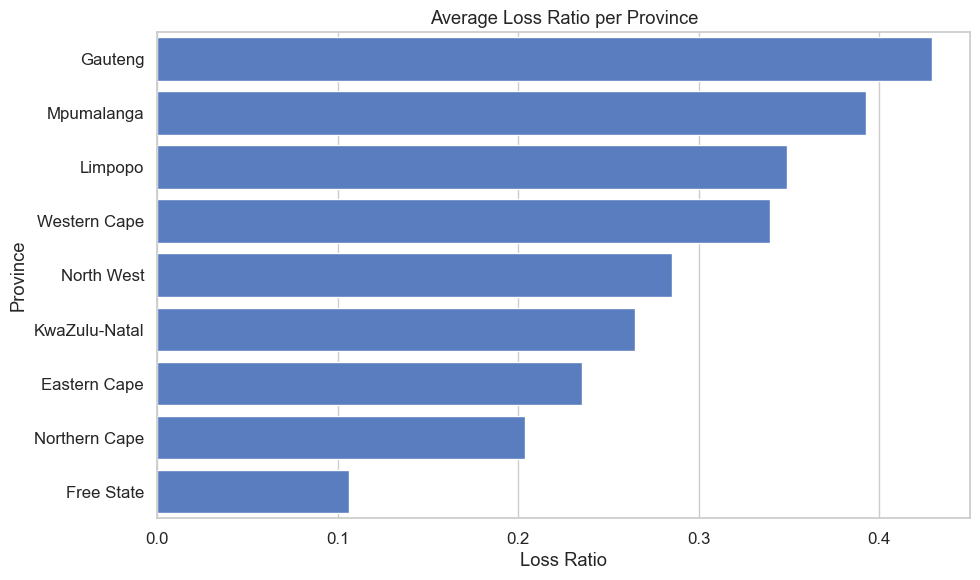

In [111]:
# Calculate average LossRatio per Province
loss_by_province = df.groupby('Province')['LossRatio'].mean().reset_index().sort_values(by='LossRatio', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=loss_by_province, x='LossRatio', y='Province')  # no palette needed
plt.title('Average Loss Ratio per Province')  # removed emoji
plt.xlabel('Loss Ratio')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


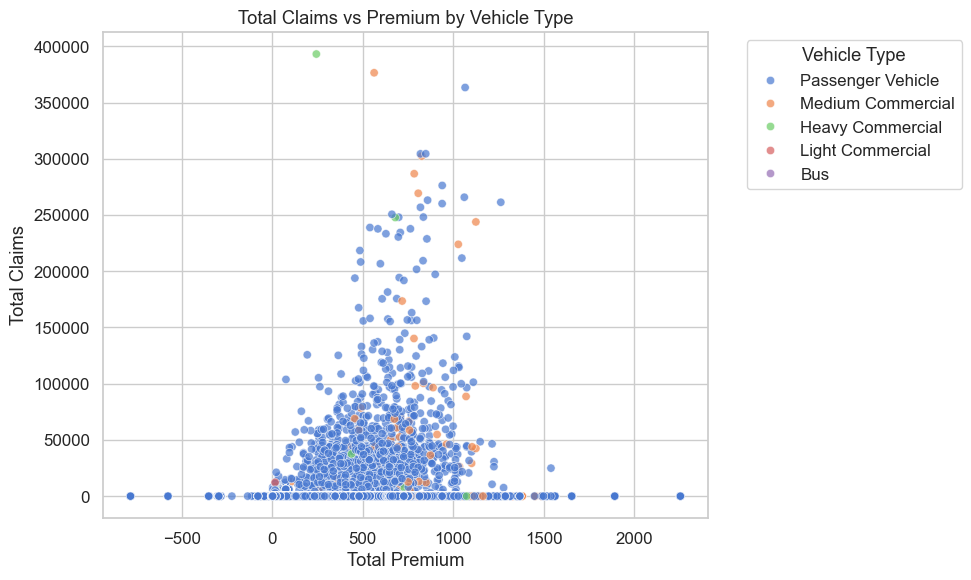

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='VehicleType', alpha=0.7)
plt.title('Total Claims vs Premium by Vehicle Type')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


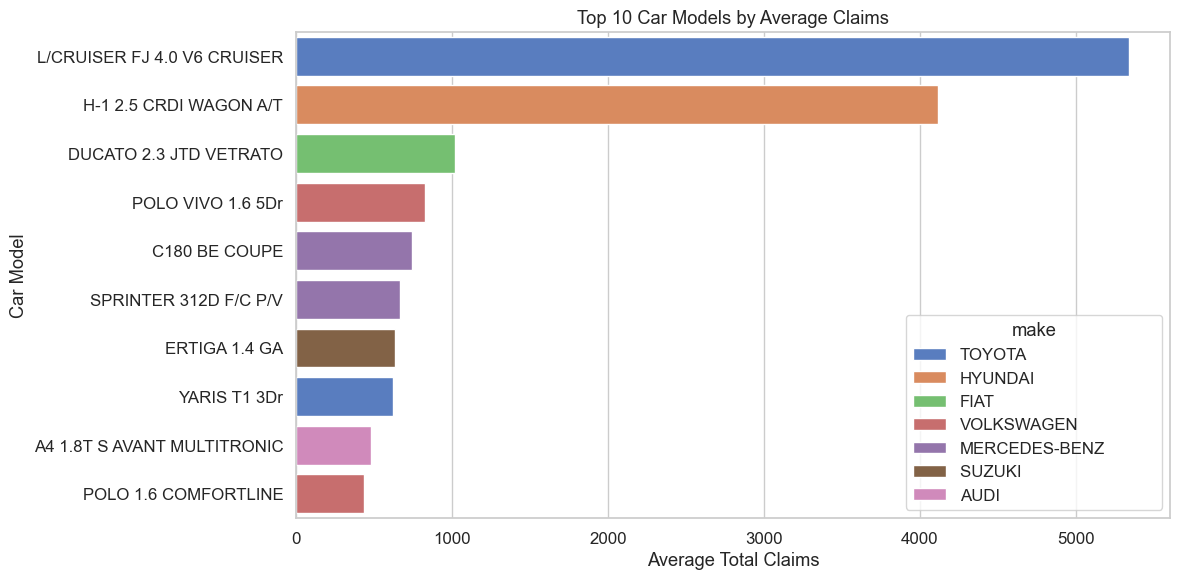

In [59]:
top_models = df.groupby(['make', 'Model'])[['TotalPremium', 'TotalClaims']].mean().reset_index()
top_models = top_models.sort_values('TotalClaims', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x='TotalClaims', y='Model', hue='make')
plt.title('Top 10 Car Models by Average Claims')
plt.xlabel('Average Total Claims')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


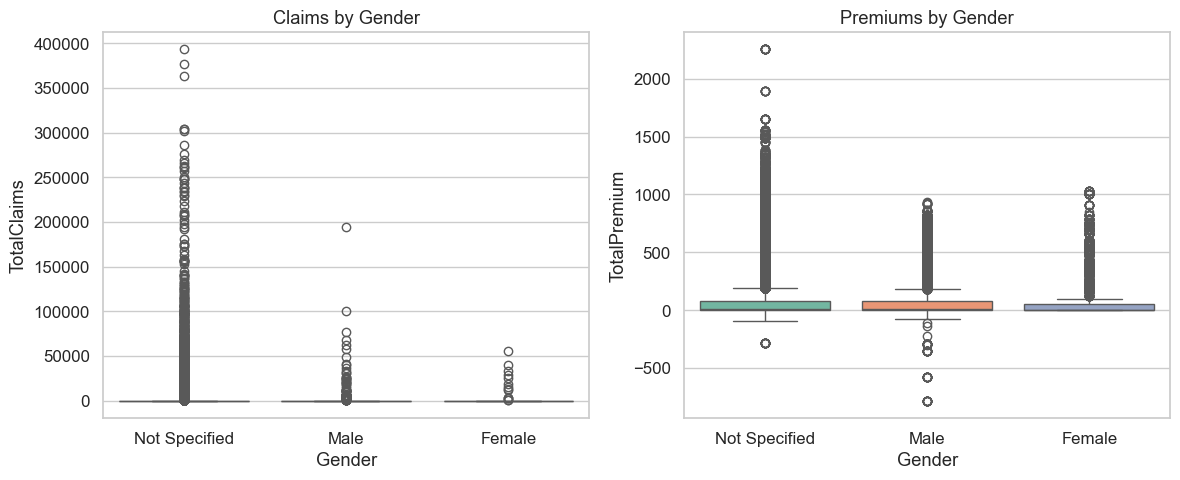

In [114]:
plt.figure(figsize=(12, 5))

# Boxplot for Claims
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='TotalClaims', hue='Gender', palette='Set2', legend=False)
plt.title('Claims by Gender')

# Boxplot for Premiums
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Gender', y='TotalPremium', hue='Gender', palette='Set2', legend=False)
plt.title('Premiums by Gender')

plt.tight_layout()
plt.show()
